In [3]:
from sodapy import Socrata
import pandas as pd

In [4]:
with open("secret.txt") as f:
    token = f.read()

In [55]:
client = Socrata("data.sfgov.org", app_token=token)

In [86]:
for i in list(range(0, 11000, 1000)):
    print(i, i+1000)

0 1000
1000 2000
2000 3000
3000 4000
4000 5000
5000 6000
6000 7000
7000 8000
8000 9000
9000 10000
10000 11000


In [87]:
data = []
query = "service_name='Street and Sidewalk Cleaning'"
for i in range(0, 11000, 1000):
    results = client.get("vw6y-z8j6",
                        select="*",
                        offset=i,
                        limit=1000)
    data.append(results)

In [90]:
pd.concat([pd.DataFrame(subset) for subset in data], axis=0)

,service_request_id,requested_datetime,updated_datetime,status_description,status_notes,agency_responsible,service_name,service_subtype,service_details,address,...,media_url,:@computed_region_fcz8_est8,:@computed_region_nqbw_i6c3,:@computed_region_n4xg_c4py,:@computed_region_viu7_rrfi,:@computed_region_6ezc_tdp2,:@computed_region_h4ep_8xdi,:@computed_region_2dwj_jsy4,closed_date,:@computed_region_y6ts_4iup
0,16648111,2023-04-09T01:18:14.000,2023-04-09T03:09:02.000,Open,accepted,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,"810 CLEMENT ST, SAN FRANCISCO, CA, 94118",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16648110,2023-04-09T01:15:14.000,2023-04-09T01:15:15.000,Open,open,Entertainment Commission - G,Noise Report,entertainment,Noise Report - entertainment,"314 11TH ST, SAN FRANCISCO, CA, 94103",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16648109,2023-04-09T01:14:14.000,2023-04-09T03:08:57.000,Open,closed,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,Intersection of COLE ST and HAIGHT ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16648108,2023-04-09T01:12:09.000,2023-04-09T03:08:54.000,Open,accepted,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,"401 SUTTER ST, SAN FRANCISCO, CA, 94108",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16648107,2023-04-09T01:11:21.000,2023-04-09T01:30:06.000,Open,accepted,DPT Meter_Bike Queue,Damaged Property,Damaged Parking_Meter,Parking_Meter,"1311 SUTTER ST, SAN FRANCISCO, CA, 94109",...,{'url': 'https://mobile311.sfgov.org/media/san...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,16628313,2023-04-04T10:53:00.000,2023-04-04T12:00:56.000,Closed,Case Resolved - Pickup completed.,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,"1139 STOCKTON ST, SAN FRANCISCO, CA, 94133",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-04T12:00:56.000,NaN
996,16628314,2023-04-04T10:53:00.000,2023-04-04T11:31:40.000,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,Other Loose Garbage,Intersection of 47TH AVE and TARAVAL ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,16628316,2023-04-04T10:53:00.000,2023-04-04T11:31:38.000,Open,open,DPW Ops Queue,Graffiti,Graffiti on Other_enter_additional_details_below,Other_enter_additional_details_below - Offensive,"2566 BAY SHORE BLVD, SAN FRANCISCO, CA, 94134",...,{'url': 'https://mobile311.sfgov.org/media/san...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,16628317,2023-04-04T10:53:00.000,2023-04-04T11:31:36.000,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,Other Loose Garbage,Intersection of CARROLL AVE and GRIFFITH ST,...,{'url': 'https://mobile311.sfgov.org/media/san...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
results_df = pd.DataFrame.from_records(results)

In [70]:
results_df[[col for col in results_df.columns if not col.startswith(":@")]]

,service_request_id,requested_datetime,updated_datetime,status_description,status_notes,agency_responsible,service_name,service_subtype,service_details,address,street,supervisor_district,neighborhoods_sffind_boundaries,police_district,lat,long,point,source,media_url,closed_date
0,16648111,2023-04-09T01:18:14.000,2023-04-09T03:09:02.000,Open,accepted,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,"810 CLEMENT ST, SAN FRANCISCO, CA, 94118",CLEMENT ST,1,Inner Richmond,RICHMOND,37.782877567259,-122.467780206467,"{'latitude': '37.78287757', 'longitude': '-122...",Mobile/Open311,NaN,NaN
1,16648110,2023-04-09T01:15:14.000,2023-04-09T01:15:15.000,Open,open,Entertainment Commission - G,Noise Report,entertainment,Noise Report - entertainment,"314 11TH ST, SAN FRANCISCO, CA, 94103",11TH ST,6,South of Market,SOUTHERN,37.7714296,-122.4138772,"{'latitude': '37.7714296', 'longitude': '-122....",Mobile/Open311,NaN,NaN
2,16648109,2023-04-09T01:14:14.000,2023-04-09T03:08:57.000,Open,closed,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,Intersection of COLE ST and HAIGHT ST,COLE ST,5,Haight Ashbury,PARK,37.76940905292,-122.450616946526,"{'latitude': '37.76940905', 'longitude': '-122...",Mobile/Open311,NaN,NaN
3,16648108,2023-04-09T01:12:09.000,2023-04-09T03:08:54.000,Open,accepted,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,"401 SUTTER ST, SAN FRANCISCO, CA, 94108",SUTTER ST,3,Downtown / Union Square,CENTRAL,37.789295718111,-122.406885482747,"{'latitude': '37.78929572', 'longitude': '-122...",Mobile/Open311,NaN,NaN
4,16648107,2023-04-09T01:11:21.000,2023-04-09T01:30:06.000,Open,accepted,DPT Meter_Bike Queue,Damaged Property,Damaged Parking_Meter,Parking_Meter,"1311 SUTTER ST, SAN FRANCISCO, CA, 94109",SUTTER ST,2,Cathedral Hill,NORTHERN,37.787476265049,-122.42221622885,"{'latitude': '37.78747627', 'longitude': '-122...",Mobile/Open311,{'url': 'https://mobile311.sfgov.org/media/san...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,16646435,2023-04-08T13:03:28.000,2023-04-09T04:43:55.000,Open,closed,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,"4200 GEARY BLVD, SAN FRANCISCO, CA, 94118",GEARY BLVD,1,Inner Richmond,RICHMOND,37.7811332513,-122.464199541251,"{'latitude': '37.78113325', 'longitude': '-122...",Mobile/Open311,NaN,NaN
996,16646436,2023-04-08T13:03:00.000,2023-04-08T13:15:36.000,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,Other Loose Garbage,"400 BRAZIL AVE, SAN FRANCISCO, CA, 94112",BRAZIL AVE,11,Excelsior,INGLESIDE,37.72308747717,-122.431596329978,"{'latitude': '37.72308748', 'longitude': '-122...",Mobile/Open311,{'url': 'https://mobile311.sfgov.org/media/san...,NaN
997,16646434,2023-04-08T13:03:00.000,2023-04-08T13:15:33.000,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,Other Loose Garbage,"3382 25TH ST, SAN FRANCISCO, CA, 94110",25TH ST,9,Mission,MISSION,37.750694276585,-122.417846686451,"{'latitude': '37.75069428', 'longitude': '-122...",Mobile/Open311,{'url': 'https://mobile311.sfgov.org/media/san...,NaN
998,16646430,2023-04-08T13:02:03.000,2023-04-09T04:52:40.000,Open,closed,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,"1501 POST ST, SAN FRANCISCO, CA, 94109",POST ST,2,Japantown,NORTHERN,37.785917267571,-122.426539371386,"{'latitude': '37.78591727', 'longitude': '-122...",Mobile/Open311,NaN,NaN


In [63]:
results_df.head()

,service_request_id,requested_datetime,updated_datetime,status_description,status_notes,agency_responsible,service_name,service_subtype,service_details,address,...,media_url,:@computed_region_fcz8_est8,:@computed_region_nqbw_i6c3,:@computed_region_n4xg_c4py,:@computed_region_viu7_rrfi,:@computed_region_6ezc_tdp2,:@computed_region_h4ep_8xdi,:@computed_region_2dwj_jsy4,closed_date,:@computed_region_y6ts_4iup
0,16648111,2023-04-09T01:18:14.000,2023-04-09T03:09:02.000,Open,accepted,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,"810 CLEMENT ST, SAN FRANCISCO, CA, 94118",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16648110,2023-04-09T01:15:14.000,2023-04-09T01:15:15.000,Open,open,Entertainment Commission - G,Noise Report,entertainment,Noise Report - entertainment,"314 11TH ST, SAN FRANCISCO, CA, 94103",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16648109,2023-04-09T01:14:14.000,2023-04-09T03:08:57.000,Open,closed,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,Intersection of COLE ST and HAIGHT ST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16648108,2023-04-09T01:12:09.000,2023-04-09T03:08:54.000,Open,accepted,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,"401 SUTTER ST, SAN FRANCISCO, CA, 94108",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16648107,2023-04-09T01:11:21.000,2023-04-09T01:30:06.000,Open,accepted,DPT Meter_Bike Queue,Damaged Property,Damaged Parking_Meter,Parking_Meter,"1311 SUTTER ST, SAN FRANCISCO, CA, 94109",...,{'url': 'https://mobile311.sfgov.org/media/san...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
results_df['requested_datetime'] = pd.to_datetime(results_df['requested_datetime'])

In [39]:
results_df['hour'] = results_df['requested_datetime'].dt.hour

<AxesSubplot:xlabel='hour'>

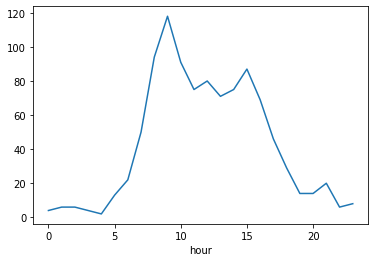

In [40]:
results_df.groupby('hour').count()['service_request_id'].plot()

In [28]:
results_df.groupby('hour').count()['service_request_id']

hour
0      21
1       9
2      15
3      42
4      24
5      12
6      22
7      96
8     149
9     163
10    158
11    158
12    159
13    133
14    124
15    150
16    121
17    100
18    112
19     65
20     68
21     30
22     39
23     30
Name: service_request_id, dtype: int64

In [72]:
import retrieval_311

In [73]:
retrieval_311.get_311()

,service_request_id,requested_datetime,updated_datetime,status_description,status_notes,agency_responsible,service_name,service_subtype,service_details,address,street,supervisor_district,neighborhoods_sffind_boundaries,police_district,lat,long,point,source,media_url,closed_date
0,16648111,2023-04-09T01:18:14.000,2023-04-09T03:09:02.000,Open,accepted,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,"810 CLEMENT ST, SAN FRANCISCO, CA, 94118",CLEMENT ST,1,Inner Richmond,RICHMOND,37.782877567259,-122.467780206467,"{'latitude': '37.78287757', 'longitude': '-122...",Mobile/Open311,NaN,NaN
1,16648110,2023-04-09T01:15:14.000,2023-04-09T01:15:15.000,Open,open,Entertainment Commission - G,Noise Report,entertainment,Noise Report - entertainment,"314 11TH ST, SAN FRANCISCO, CA, 94103",11TH ST,6,South of Market,SOUTHERN,37.7714296,-122.4138772,"{'latitude': '37.7714296', 'longitude': '-122....",Mobile/Open311,NaN,NaN
2,16648109,2023-04-09T01:14:14.000,2023-04-09T03:08:57.000,Open,closed,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,Intersection of COLE ST and HAIGHT ST,COLE ST,5,Haight Ashbury,PARK,37.76940905292,-122.450616946526,"{'latitude': '37.76940905', 'longitude': '-122...",Mobile/Open311,NaN,NaN
3,16648108,2023-04-09T01:12:09.000,2023-04-09T03:08:54.000,Open,accepted,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,"401 SUTTER ST, SAN FRANCISCO, CA, 94108",SUTTER ST,3,Downtown / Union Square,CENTRAL,37.789295718111,-122.406885482747,"{'latitude': '37.78929572', 'longitude': '-122...",Mobile/Open311,NaN,NaN
4,16648107,2023-04-09T01:11:21.000,2023-04-09T01:30:06.000,Open,accepted,DPT Meter_Bike Queue,Damaged Property,Damaged Parking_Meter,Parking_Meter,"1311 SUTTER ST, SAN FRANCISCO, CA, 94109",SUTTER ST,2,Cathedral Hill,NORTHERN,37.787476265049,-122.42221622885,"{'latitude': '37.78747627', 'longitude': '-122...",Mobile/Open311,{'url': 'https://mobile311.sfgov.org/media/san...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,16646435,2023-04-08T13:03:28.000,2023-04-09T04:43:55.000,Open,closed,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,"4200 GEARY BLVD, SAN FRANCISCO, CA, 94118",GEARY BLVD,1,Inner Richmond,RICHMOND,37.7811332513,-122.464199541251,"{'latitude': '37.78113325', 'longitude': '-122...",Mobile/Open311,NaN,NaN
996,16646436,2023-04-08T13:03:00.000,2023-04-08T13:15:36.000,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,Other Loose Garbage,"400 BRAZIL AVE, SAN FRANCISCO, CA, 94112",BRAZIL AVE,11,Excelsior,INGLESIDE,37.72308747717,-122.431596329978,"{'latitude': '37.72308748', 'longitude': '-122...",Mobile/Open311,{'url': 'https://mobile311.sfgov.org/media/san...,NaN
997,16646434,2023-04-08T13:03:00.000,2023-04-08T13:15:33.000,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,Other Loose Garbage,"3382 25TH ST, SAN FRANCISCO, CA, 94110",25TH ST,9,Mission,MISSION,37.750694276585,-122.417846686451,"{'latitude': '37.75069428', 'longitude': '-122...",Mobile/Open311,{'url': 'https://mobile311.sfgov.org/media/san...,NaN
998,16646430,2023-04-08T13:02:03.000,2023-04-09T04:52:40.000,Open,closed,Recology_Overflowing,Street and Sidewalk Cleaning,City_garbage_can_overflowing,City_garbage_can_overflowing,"1501 POST ST, SAN FRANCISCO, CA, 94109",POST ST,2,Japantown,NORTHERN,37.785917267571,-122.426539371386,"{'latitude': '37.78591727', 'longitude': '-122...",Mobile/Open311,NaN,NaN


In [91]:
url = "https://data.sfgov.org/api/views/vw6y-z8j6/rows.csv?accessType=DOWNLOAD"

In [93]:
df = pd.read_csv(url)

In [94]:
df.head()

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,...,DELETE - HSOC Zones,Fix It Zones as of 2018-02-07,"CBD, BID and GBD Boundaries as of 2017",Central Market/Tenderloin Boundary,"Areas of Vulnerability, 2016",Central Market/Tenderloin Boundary Polygon - Updated,HSOC Zones as of 2018-06-05,OWED Public Spaces,Parks Alliance CPSI (27+TL sites),Neighborhoods
0,6501676,11/06/2016 10:10:45 AM,11/07/2016 09:11:12 AM,11/07/2016 09:11:12 AM,Closed,Case Resolved - 10-98,DPW Ops Queue,Encampments,Encampment Reports,Encampment Cleanup,...,3.0,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,53.0
1,6484030,11/01/2016 11:26:26 AM,11/01/2016 04:59:33 PM,11/01/2016 04:59:33 PM,Closed,Case Resolved - Pickup completed,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,Mattress,...,NaN,NaN,5.0,NaN,2.0,NaN,NaN,NaN,NaN,50.0
2,6505388,11/07/2016 11:08:09 AM,11/12/2016 04:40:17 PM,11/12/2016 04:40:17 PM,Closed,Case Resolved - entire area is trashed out nee...,DPW Ops Queue,Street and Sidewalk Cleaning,Bulky Items,Electronics,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,78.0
3,6504738,11/07/2016 09:41:28 AM,11/07/2016 11:11:06 AM,11/07/2016 11:11:06 AM,Closed,Case Resolved - If the bridge is closed DPW ca...,DPW Ops Queue,Street and Sidewalk Cleaning,Human or Animal Waste,Human or Animal Waste,...,NaN,10.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,54.0
4,6507086,11/07/2016 03:40:03 PM,11/08/2016 10:10:08 AM,11/08/2016 10:10:08 AM,Closed,Case Resolved - meter shop has closed this req...,DPT Meter_Bike Queue,Damaged Property,Damaged Parking_Meter,Parking_Meter,...,3.0,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,53.0


In [99]:
df_cleaning = df[df['Category'] == 'Street and Sidewalk Cleaning']

In [101]:
df_cleaning.dropna(axis=1).to_csv("data/extract.csv")